In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
import cv2

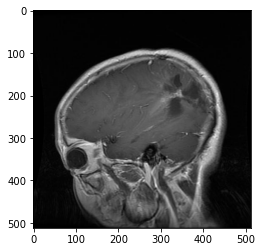

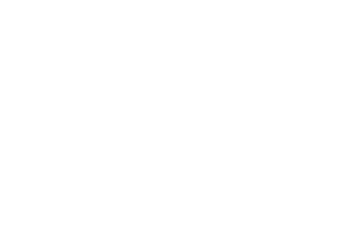

In [2]:
DATA = r"/kaggle/input/brain-tumor-classification-mri/Training/" #reading the data
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"] #defining the 4 categories that we have
for category in CATEGORIES:
    path = os.path.join(DATA,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break

(-0.5, 149.5, 149.5, -0.5)

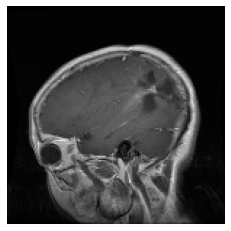

In [3]:
IMG_SIZE = 150 #defining our image size
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))#scaling down our images  
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

In [4]:
training_data = [] #manipulating our training data

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA,category)
        class_num = CATEGORIES.index(category) #defining the different categories of the images in our data
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #loading the images in grayscale
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num]) #adding our data in to the training_data list which we will use to define our X and y for train-tets split
            except Exception as e:
                pass
create_training_data()

In [5]:
X = [] #used for storing  the features
y = [] #used for storing the labels
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
#print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)
print(X.shape)

(2870, 150, 150, 1)


In [6]:
from keras.utils.np_utils import to_categorical #one-hot eencoding our values
y = to_categorical(y, num_classes = 4)

In [7]:
from sklearn.model_selection import train_test_split #splitting the data into training and validaton set
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (2296, 150, 150, 1)
x_test shape (574, 150, 150, 1)
y_train shape (2296, 4)
y_test shape (574, 4)


In [29]:
#defining our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50  
batch_size = 40
datagen = ImageDataGenerator(  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  

In [30]:
model.summary() #checking what our final model would look like

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 150, 150, 64)      640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 37, 37, 128)      

In [31]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val))    

Epoch 1/50
58/58 [==============================] - 3s 46ms/step - loss: 1.3275 - accuracy: 0.3659 - val_loss: 1.2372 - val_accuracy: 0.5035
Epoch 2/50
58/58 [==============================] - 2s 39ms/step - loss: 1.0738 - accuracy: 0.5353 - val_loss: 0.9557 - val_accuracy: 0.6028
Epoch 3/50
58/58 [==============================] - 2s 40ms/step - loss: 0.8762 - accuracy: 0.6220 - val_loss: 0.8716 - val_accuracy: 0.6080
Epoch 4/50
58/58 [==============================] - 2s 40ms/step - loss: 0.7291 - accuracy: 0.6960 - val_loss: 0.6709 - val_accuracy: 0.7369
Epoch 5/50
58/58 [==============================] - 2s 39ms/step - loss: 0.6185 - accuracy: 0.7430 - val_loss: 0.5653 - val_accuracy: 0.7840
Epoch 6/50
58/58 [==============================] - 2s 39ms/step - loss: 0.5606 - accuracy: 0.7648 - val_loss: 0.6285 - val_accuracy: 0.7160
Epoch 7/50
58/58 [==============================] - 2s 39ms/step - loss: 0.4923 - accuracy: 0.8140 - val_loss: 0.5152 - val_accuracy: 0.8240
Epoch 8/50
58

Text(0.5, 0, 'epoch')

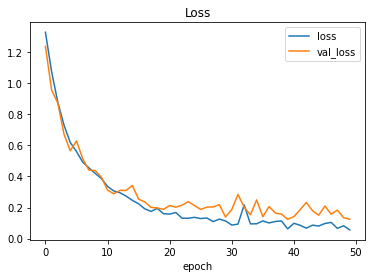

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

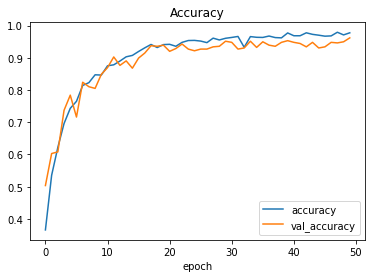

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [34]:
model.save('ReadyModel.h5')